### Installations

In [1]:
# !conda install nltk --yes
# !conda install -c conda-forge wordcloud --yes
# !conda install -c anaconda scikit-learn --yes

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("../Restaurant_Reviews.csv")

 In Python, `re` stands for "Regular Expressions." It is a built-in module that provides support for regular expressions. Regular expressions are powerful tools for pattern matching and text manipulation. The re module allows you to work with regular expressions in Python, enabling you to search for patterns within strings, replace text based on patterns, and more.

#### Here's a brief overview of some commonly used functions and methods in the re module:
1. `re.compile(pattern)`: Compiles a regular expression pattern into a regex object for efficient use in matching and searching.
1. `re.search(pattern, string)`: Searches for the first occurrence of the pattern in the given string and returns a match object if found.
1. `re.match(pattern, string)`: Matches the pattern only at the beginning of the string and returns a match object if it's a match.
1. `re.findall(pattern, string)`: Returns all non-overlapping matches of the pattern in the string as a list of strings.
1. `re.finditer(pattern, string)`: Returns an iterator yielding match objects for all non-overlapping matches of the pattern in the string.
1. `re.sub(pattern, replacement, string)`: Replaces all occurrences of the pattern in the string with the specified replacement.

1. `nltk.download('stopwords')`: This line is used to download the NLTK stopwords dataset. Stopwords are common words (e.g., "the," "and," "in") that are often removed from text during text preprocessing because they don't usually carry significant meaning in text analysis. This download makes sure you have the stopwords dataset available for your NLP tasks.
1. `from nltk.corpus import stopwords` : import that stopword dataset
1. `from nltk.stem.porter import PorterStemmer`: This import brings in the Porter Stemmer algorithm from NLTK. A stemmer is used in NLP to reduce words to their root or base form. The Porter Stemmer is a popular algorithm for stemming words, which means it removes suffixes from words to convert them to their base form. For example, "running" becomes "run," and "jumps" becomes "jump." Stemming can be useful for text normalization in various NLP applications.

In [4]:
import string
import nltk #It is use for Natural language processing
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

1. `review=re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])`: This line uses the `re.sub` function from the `re` module to perform regular expression-based substitution in the text. It replaces any character that is not a letter (a to z, A to Z) with a space. This step effectively removes any non-alphabetical characters from the text.
1. `review=review.lower()`: It converts the entire review text to lowercase.This step ensures that the text is case-insensitive and helps standardize the text for further processing.
1. `review_words=review.split()`: The `split()` method splits the `review` string into a list of words. By default, it splits on whitespace, effectively creating a list of individual words.
1. `review_words=[word for word in review_words if not word in set(stopwords.words('english'))]`: Here, we are using a list comprehension to filter out common English `stopwords` from the `review_words` list. It checks if each word is not in the set of English `stopwords` provided by NLTK's `stopwords.words('english')` and retains only the words that are not `stopwords`.(the,and,in etc.)
1. `ps=PorterStemmer()`: This line creates an instance of the Porter Stemmer from NLTK. The Porter Stemmer is used for word stemming, which reduces words to their base or root form. Stemming helps to group similar words together.
1. `review=[ps.stem(word) for word in review_words]`: Another list comprehension is used here to apply stemming to each word in the `review_words` list using the Porter Stemmer. This replaces each word with its stemmed form.
1. `review=' '.join(review)`: After stemming, the list of words is joined back together into a single string with words separated by spaces.
1. `corpus.append(review)`: Finally, the preprocessed review is added to the corpus list. This list will contain all the preprocessed text reviews from the dataset.

In [5]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)
    

In [ ]:
corpus[:1500]

### Not necessary

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # turns off the axis labels 
plt.show()

In [ ]:
word_cloud=data.loc[data['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # turns off the axis labels 
plt.show()

### CountVectorizer:

`CountVectorizer` is a text preprocessing technique that is used to convert a collection of text documents into a numerical feature matrix. It works by counting the number of times each word (or term) appears in the text and representing this information as a matrix.

#### Here are some key points about CountVectorizer:

1. `Tokenization`: It tokenizes the text, which means it breaks the text down into individual words or terms.

1. `Vocabulary Building`: It builds a vocabulary of all the unique words (terms) in the text corpus. Each word becomes a feature, and the position (column) of the word in the feature matrix represents that word.

1. `Counting`: For each document in the corpus, it counts how many times each word from the vocabulary appears in that document.

1. `Sparse Matrix`: The result is a sparse matrix where each row corresponds to a document, and each column corresponds to a word from the vocabulary. The matrix contains the word counts for each document.

1. `Feature Extraction`: CountVectorizer transforms the text data into a format that can be used as input for machine learning algorithms. This numerical representation allows you to apply various machine learning techniques to text data.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

1. `vectorizer=CountVectorizer(max_features=1500)`: Here, we are creating an instance of the `CountVectorizer` class and specifying the parameter `max_features=1500`. This parameter limits the number of features (words) that will be included in the feature matrix to the top 1500 most frequent words in the corpus. It's a way to reduce the dimensionality of the feature matrix, which can help manage memory and improve model performance.
1. `x=vectorizer.fit_transform(corpus).toarray()`: This line is where the magic happens:

    - `vectorizer.fit_transform(corpus)` fits the `CountVectorizer` to the corpus (the preprocessed text data we created earlier) and transforms it into a feature matrix. Each row of the matrix corresponds to a document in the corpus, and each column represents a word from the vocabulary.
    - `.toarray()` converts the resulting sparse matrix into a dense NumPy array. This is done because many machine learning algorithms prefer or require dense arrays as input.
1. `y=data.iloc[:,1].values`: This line is used to extract the target variable (usually labels or classes) from the dataset stored in the DataFrame data. Specifically:
    - `data.iloc[:,1]` extracts all rows from the second column(Liked) of the DataFrame (Python uses 0-based indexing, so the second column is indexed as 1).
    - `.values` converts the selected column into a `NumPy` array. This is commonly done to ensure that y is a NumPy array that can be used as the target variable for machine learning models.<br>

This code cell is preparing the text data for machine learning by using `CountVectorizer` to convert the text corpus into a feature matrix `x`. It also extracts the target variable `y` from the dataset. This is a typical setup for `supervised machine learning` tasks where we have text data and corresponding labels or classes that we want to use to train a predictive model.

In [11]:
vectorizer=CountVectorizer(max_features=1500)
x=vectorizer.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('-----scores-----')
print('accuracy score {}%'.format(round(accuracy*100,2)))
print('precision score {}%'.format(round(precision*100,2)))
print('recall score {}%'.format(round(recall*100,2)))


In [ ]:
c_m=confusion_matrix(y_test,y_pred)
c_m

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(95.72222222222221, 0.5, 'Actual value')

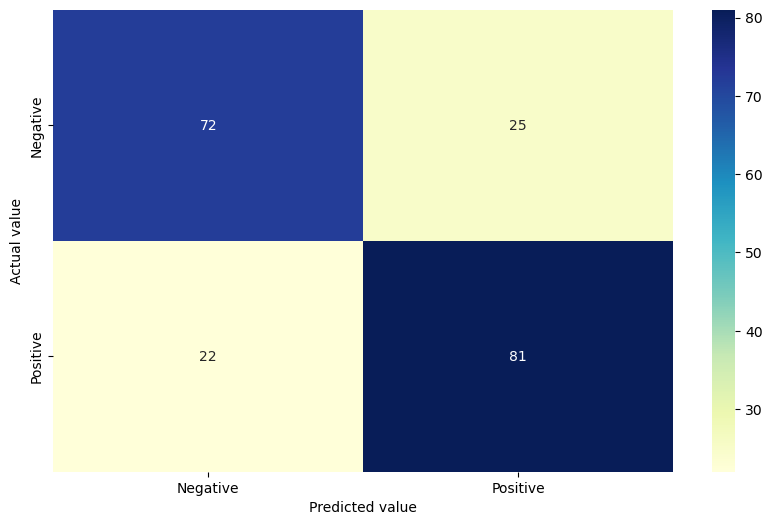

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(c_m,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [21]:
# Hyper parameter tuning
best_accuracy=0.0
alpha_value=0

for i in np.arange(0.01,1.1,0.1):
    temp_cls=MultinomialNB(alpha=i)
    temp_cls.fit(X_train,y_train)
    y_test_pred_h_nbayes=temp_cls.predict(X_test)
    score=accuracy_score(y_test,y_test_pred_h_nbayes)
    print("accuracy score for alpha-{} is :{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_value=i
print('.......................')
print("the best accuracy is {}%".format(round(best_accuracy*100,2),round(alpha_value,1)))

accuracy score for alpha-0.0 is :76.5%
accuracy score for alpha-0.1 is :78.0%
accuracy score for alpha-0.2 is :78.5%
accuracy score for alpha-0.3 is :78.0%
accuracy score for alpha-0.4 is :78.0%
accuracy score for alpha-0.5 is :77.5%
accuracy score for alpha-0.6 is :77.5%
accuracy score for alpha-0.7 is :77.5%
accuracy score for alpha-0.8 is :77.0%
accuracy score for alpha-0.9 is :76.5%
accuracy score for alpha-1.0 is :76.5%
.......................
the best accuracy is 78.5%


In [22]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [23]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=vectorizer.transform([final_review]).toarray()
    return classifier.predict(temp)

In [24]:
# review = "food is really bad"
review="food is wonderful pleasing"
if predict_sentiment(review):
    print("positive review")
else:
    print("negative review")

positive review
